In [1]:
import tensorflow as tf
import numpy as np

In [2]:
np.random.seed(101)
tf.set_random_seed(101)

In [3]:
rand_a = np.random.uniform(0,100,(5,5))
rand_a

array([[51.63986277, 57.06675869,  2.84742265, 17.15216562, 68.52769817],
       [83.38968626, 30.69662197, 89.36130797, 72.15438618, 18.99389542],
       [55.42275911, 35.2131954 , 18.18924027, 78.56017619, 96.54832224],
       [23.23536618,  8.35614337, 60.35484223, 72.89927573, 27.62388285],
       [68.53063288, 51.78674742,  4.84845374, 13.78692376, 18.69674261]])

In [4]:
rand_b = np.random.uniform(0,100,(5,1))
rand_b

array([[99.43179012],
       [52.06653967],
       [57.87895355],
       [73.48190583],
       [54.19617722]])

In [5]:
a = tf.placeholder(tf.float32)

In [6]:
b = tf.placeholder(tf.float32)

In [7]:
add = a + b
mul = a*b

In [8]:
with tf.Session() as sess:
    add_res = sess.run(add,feed_dict={a:rand_a,b:rand_b})
    print(add_res)
    mul_res = sess.run(mul ,feed_dict={a:rand_a,b:rand_b})
    print(mul_res)

[[151.07166  156.49855  102.27921  116.58396  167.95949 ]
 [135.45622   82.76316  141.42784  124.22093   71.06043 ]
 [113.30171   93.09215   76.06819  136.43912  154.42728 ]
 [ 96.71727   81.83804  133.83675  146.38118  101.10579 ]
 [122.72681  105.982925  59.044632  67.9831    72.89292 ]]
[[5134.644   5674.25     283.12433 1705.4707  6813.8315 ]
 [4341.8125  1598.267   4652.734   3756.8293   988.94635]
 [3207.8113  2038.1029  1052.7742  4546.9805  5588.1157 ]
 [1707.379    614.02527 4434.989   5356.7773  2029.8555 ]
 [3714.0984  2806.6438   262.76764  747.19855 1013.292  ]]


In [9]:
n_feat = 10
n_dense_neurons = 3

In [10]:
x = tf.placeholder(tf.float32,(None,n_feat))

In [11]:
w =tf.Variable(tf.random_normal([n_feat,n_dense_neurons]))
b = tf.Variable(tf.zeros([n_dense_neurons]))

In [12]:
xW = tf.matmul(x,w)

In [13]:
z = tf.add(xW,b)

In [14]:
act = tf.sigmoid(z)

In [15]:
init = tf.global_variables_initializer()

In [16]:
with tf.Session() as sess:
    sess.run(init)
    
    layer_out = sess.run(act,feed_dict={x : np.random.random([1,n_feat])})

In [17]:
print(layer_out)

[[0.08226703 0.662723   0.17261438]]


## Regression

In [18]:
x_data = np.linspace(0,10,10)+ np.random.uniform(-1.5,1.5,10)

In [20]:
x_data

array([-1.20856056, -0.08034641,  2.82674411,  4.50477294,  3.42312535,
        4.88227319,  7.18414126,  6.77068715,  9.4930023 ,  9.96290567])

In [21]:
y_lab = np.linspace(0,10,10)+np.random.uniform(-1.5,1.5,10)

In [22]:
y_lab


array([0.5420333 , 1.17575569, 0.85241231, 2.50514314, 4.67005971,
       4.41685654, 6.66701681, 6.69180648, 7.54731409, 9.03483077])

In [23]:
import matplotlib.pyplot as plt

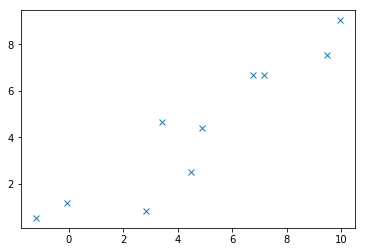

In [25]:
plt.plot(x_data,y_lab,'x')

In [26]:
ar = np.random.rand(2)

In [27]:
m = tf.Variable(ar[0])

In [28]:
b =tf.Variable(ar[1])

In [29]:
ar

array([0.44236813, 0.87758732])

In [31]:
loss = 0

for x,y in zip(x_data,y_lab):
    y_hat  = m*x + b
    
    loss = loss + (y-y_hat)**2
    

In [32]:
opt = tf.train.GradientDescentOptimizer(learning_rate=0.001)

In [33]:
train = opt.minimize(loss)

In [34]:
init = tf.global_variables_initializer()

In [36]:
with tf.Session() as sess:
    sess.run(init)
    
    steps = 1
    
    for i in range(steps):
        sess.run(train)
        
    final_slope, final_int = sess.run([m,b])

In [ ]:
x_test = np.linspace(-1,11,10)

y_pre = final_slope*x_test + final_int  

plt.plot(x_test)